In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [14]:
V_out=17
V_in_min = 9
V_in_max = 15
D_min = 1 - (1/(V_out/V_in_max))
D_max = 1 - (1/(V_out/V_in_min))
print('Duty cycle between {:.2} - {:.2}'.format(D_min,D_max))
P_max = 500
P_min = 20
R_max = V_out*V_out/P_min
R_min = V_out*V_out/P_max

Duty cycle between 0.12 - 0.47


In [53]:
# Duty cycle that maximizes D(1-D)^2 term in min L equation is 0.34, which is in the range of possible D
# so set L_maximizing_D to that
L_maximizing_D = 0.34

Rs = np.logspace(np.log10(R_min),np.log10(R_max),5)

Fsw = np.linspace(60000,150000,100) # 60kHz - 150 kHz

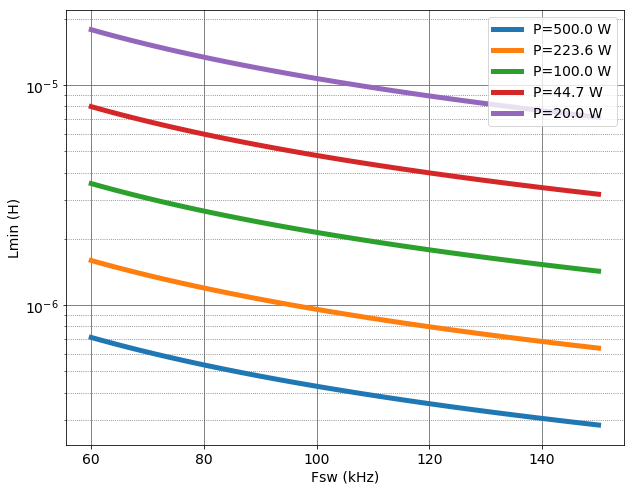

In [52]:
matplotlib.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(10,8))
for r in Rs:
    L_min = np.divide(r * L_maximizing_D * np.power(1-L_maximizing_D,2),2*Fsw)
    plt.plot(Fsw/1000,L_min,label='P={:.1f} W'.format(V_out*V_out/r),linewidth=5)
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#666666', linestyle=':')
plt.xlabel('Fsw (kHz)')
plt.ylabel('Lmin (H)')
plt.yscale('log')
plt.show()

Choose 120 kHz and a minimum inducance of 1 uH to facilitate CCM at 200W

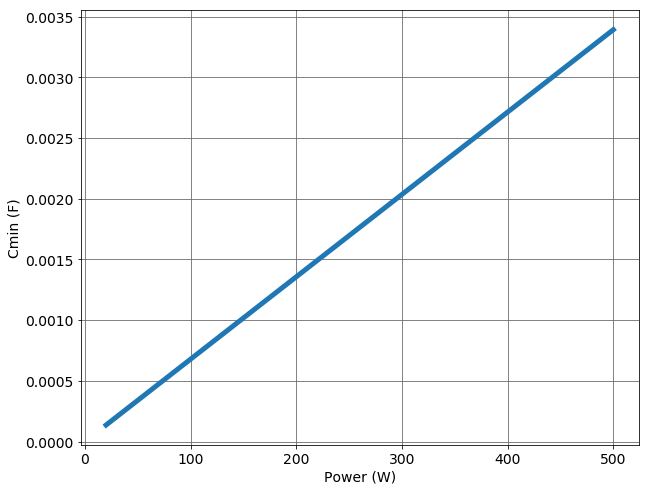

In [71]:
# Voltage ripple of 0.2%
ripple = 0.2/100
fsw = 120000
fig = plt.figure(figsize=(10,8))
C_min = np.divide(D_max,Rs*fsw*ripple)
plt.plot(V_out*V_out/Rs,C_min,linewidth=5)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#666666', linestyle=':')
plt.xlabel('Power (W)')
plt.ylabel('Cmin (F)')
plt.show()

Output capacitance should be at least 3500 uF